**Importing All the required libraries**

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

**Loading the Dataset**

In [186]:
irisData = load_iris()

**Plotting the pair plots of the data**

In [ ]:
#load the dataset as a pandas data frame
df = pd.DataFrame(irisData.data, columns=irisData.feature_names)
df['species']= irisData.target
#Categorizing the species 
df['species'].replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)

**Plotting the pair plot**

In [ ]:
#Mapping plot aspects to different colors
g = sns.pairplot(df, hue="species", palette="husl")
#displaying the table of data in rows and columns 
plt.show()
df

**Interpretation of the separability of the three classes in terms of different features (dimensions)**

The output plots the data as histogram and scatter plots which show the relationships and patterns between the three classes.

**--Analysis Based on Histogram Plots**

When analyzing the observed histogram, we can observe that whenever sepal features are considered there is a considerable amount of overlapping of the data, but as we start classifying the data based on petal features, we can differentiate setosa and there is very less overlapping of data between versicolor and virginica.

**--Analysis Based on Scatter Plots**

When analyzing the scatterplots we see a similar dependency of classification on petal features as seen in histogram plots, we see that when petal features are considered, the categorization is easier and there are very few datapoints which overlap in case of versicolor and virginica, there is less boundary overlapping. Setosa can be easily classified out of the data.

**"Therefore the best way to classify the iris dataset is by using the petal features"**


**KNN Classifier**

In [ ]:
X = irisData.data 
y = irisData.target
accuracy_list=[]
best_k=0
best_accuracy=0
#dividing the data into train, validation, and test sets (60%, 20%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
k = [1, 5, 10, 15, 20, 25, 30, 35]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train) 
    knn.predict(X_val)
    accuracy = knn.score(X_val, y_val)
    accuracy_list.append(accuracy)
    if(accuracy>best_accuracy):
        best_accuracy=accuracy
        best_k=i
plt.xlabel('k')
plt.ylabel('accuracy') 
plt.plot(k,accuracy_list)
plt.show() 
#Testing the model on the best k 
best_knn=KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train,y_train)
X = best_knn.predict(X_test)
best_bound=accuracy_score(y_test,X)
print('Accuracies:',accuracy_list)
print('The highest accuracy:',best_accuracy*100)
print('The corresponding optimal k:',best_k)
print("The accuracy for optimal k for test data = {0} is {1}".format(best_k,best_bound*100))

**Choosing the best k**

The best value of k for KNN is highly data-dependent. In general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.
When we have multiple k values of same accuracy we consider the following to select the best k:<br>
--k value must not be the multiple of the number of classes<br>
--k should not be even<br>
--k should not be too small or too large<br> 
--k = 25 is of lesser computational complexity when compared to k =30

**Hence considering all the above rules we choose the value of k to be 25**

**SVM Classifier**

Accuracies
[1.         1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         0.90909091]
[1.         1.         0.91666667 1.         0.91666667 0.83333333
 1.         1.         1.         1.        ]
[1.         1.         0.91666667 1.         0.91666667 0.83333333
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         1.        ]
[1.         1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         1.        ]
[0.92307692 1.         0.91666667 1.         0.75       0.83333333
 1.         1.         1.         1.        ]
[0.92307692 1.         0.91666667 1.         0.75       0.83333333
 1.         0.91666667 1.         1.        ]


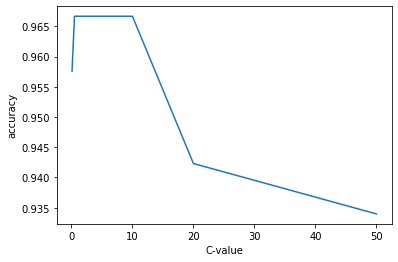

Mean Accuracies: [0.9575757575757576, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9423076923076923, 0.933974358974359]
The highest accuracy: 96.66666666666669
The corresponding optimal c value: 2
The accuracy for optimal c for test data = 2 is 100.0


In [178]:
X = irisData.data 
y = irisData.target
best_c =0
best_accuracy = 0
accuracy_list=[]
#randomly dividing the data into (80%, 20%) portions of train-validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
C_value = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
print('Accuracies')
for i in C_value:
    clf = svm.SVC(kernel='linear', random_state = 42,C=i).fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring ='accuracy')
    print(scores)
    accuracy_list.append(scores.mean())
    if(scores.mean()>best_accuracy):
        best_accuracy = scores.mean()
        best_c = i
plt.plot(C_value,accuracy_list)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()
#Testing the model on the best c
best_test_c = svm.SVC(C=best_c,kernel='linear')
best_test_c.fit(X_train,y_train)
pred = best_test_c.predict(X_test)
accuracy1 = accuracy_score(y_test,pred)
print('Mean Accuracies:',accuracy_list)
print('The highest accuracy:',best_accuracy*100)
print('The corresponding optimal c value:',best_c)
print("The accuracy for optimal c for test data = {0} is {1}".format(best_c,accuracy1*100))

**Choosing the best c**

The C parameter is a regularization/slack parameter. Its smaller values force the weights to be small. The larger it gets, the allowed range of weights gets wider. Resultantly, larger C values increase the penalty for misclassification and thus reduce the classification error rate on the training data (which may lead to over-fitting). Your training time and number of support vectors will increase as you increase the value of C and hence we choose c value to be 2 as it is smallest value among the ones providing the same accuracy.<br>

--Smaller c has smaller margin hence more misclassification-->less accuracy<br>
--Larger value of c has larger hyperplane margin, reducing the classification error rate-->better accuracy

**Hence we choose c value to be 2**

**Tree Based Classifiers**

**--Decision Tree**

Accuracies
[0.92307692 1.         1.         1.         0.75       0.83333333
 1.         1.         0.91666667 0.90909091]
[0.92307692 1.         0.91666667 1.         0.66666667 0.83333333
 1.         0.91666667 0.91666667 0.90909091]
[0.92307692 1.         1.         1.         0.66666667 0.83333333
 1.         0.91666667 1.         0.90909091]
[0.92307692 1.         1.         1.         0.66666667 0.83333333
 1.         0.91666667 1.         0.90909091]


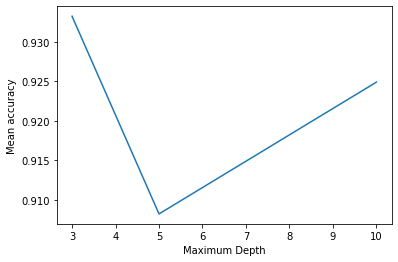

Mean Accuracies: [0.9332167832167831, 0.908216783216783, 0.9248834498834497, 0.9248834498834497]
The highest accuracy: 93.32167832167832
The corresponding optimal depth: 3
The accuracy of optimal depth for test data = 3 is 100.0


In [179]:
X = irisData.data 
y = irisData.target
depth_value=[3,5,10,None]
accuracy_value=[]
best_accuracy=0;
max_depth=0;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Accuracies')
for i in depth_value:
    c=tree.DecisionTreeClassifier(random_state=42,max_depth=i)
    scores=cross_val_score(c,X_train,y_train,cv=10,scoring='accuracy')
    print(scores)
    accuracy_value.append(scores.mean())
    if(scores.mean()>best_accuracy):
        best_accuracy=scores.mean()
        max_depth=i
        #print(i)
plt.plot(depth_value,accuracy_value)
plt.xlabel('Maximum Depth')
plt.ylabel('Mean accuracy')
plt.show()
#Testing the model using the optimal depth
c1=tree.DecisionTreeClassifier(random_state=42,max_depth=i)
c1.fit(X_train,y_train)
X_pred = c1.predict(X_test)
accuracy_scores=accuracy_score(y_test,X_pred)
print('Mean Accuracies:',accuracy_value)
print('The highest accuracy:',best_accuracy*100)
print('The corresponding optimal depth:',max_depth)
print("The accuracy of optimal depth for test data = {0} is {1}".format(max_depth,accuracy_scores*100))

**From the graph we observe that the optimal depth is 3 and this has the maximum accuracy**

**Random Forest Classifier**

In [180]:
accuracy_list = [] 
tree_list=[5, 10, 50, 150, 200] 
Depth=[3, 5, 10, None]
max_accuracy=0 
d_list= []
for i in tree_list:
    accuracy_list=[]   
    for n in Depth:
        Ran_F=RandomForestClassifier(n_estimators=i ,max_depth=n, random_state = 42)
        cross_val = cross_val_score(Ran_F , X_train, y_train,cv = 10 , scoring = 'accuracy')
        accuracy_list.append(cross_val.mean())
        if(cross_val.mean()>max_accuracy):
            max_accuracy = cross_val.mean()
            optimal_tree = i
            optimal_depth = n
    d_list.append(accuracy_list)
Ran_F1=RandomForestClassifier(n_estimators=i ,max_depth=n, random_state = 42)
Ran_F1.fit(X_train,y_train)
X_pred = Ran_F1.predict(X_test)
accuracy_scores=accuracy_score(y_test,X_pred)
print("The accuracies are as follows:")
print(d_list)
print("The maximum accuracy for the optimal number of trees:",optimal_tree,"and optimal max depth:",optimal_depth,"is",accuracy_scores*100)

The accuracies are as follows:
[[0.9248834498834497, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497], [0.9332167832167831, 0.9248834498834497, 0.9248834498834497, 0.9248834498834497], [0.9415501165501163, 0.9415501165501163, 0.9332167832167831, 0.9332167832167831], [0.9415501165501163, 0.9332167832167831, 0.9248834498834497, 0.9248834498834497], [0.9415501165501163, 0.9332167832167831, 0.9332167832167831, 0.9332167832167831]]
The maximum accuracy for the optimal number of trees: 50 and optimal max depth: 3 is 100.0


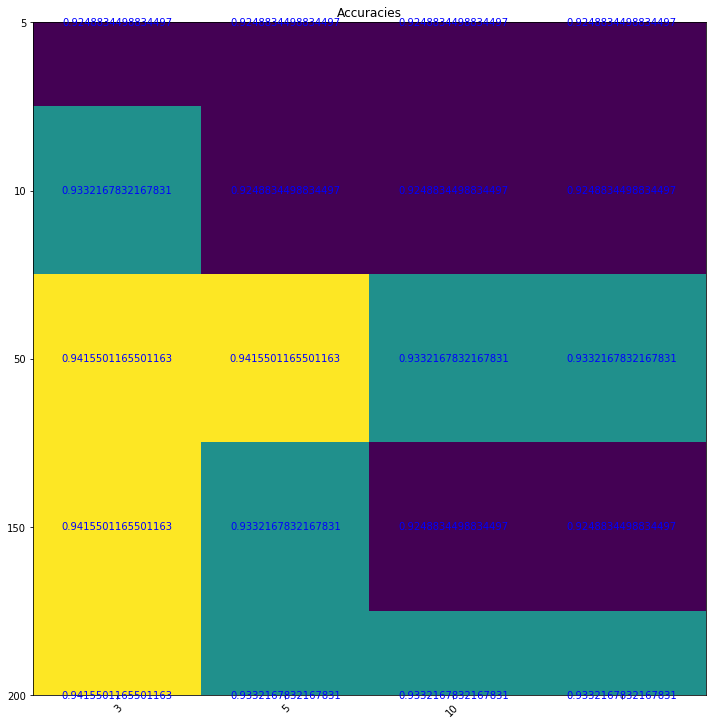

In [184]:
fig, plot = plt.subplots(figsize=(10,15))
im = plot.imshow(d_list)
plot.set_xticks(np.arange(len(Depth)))
plot.set_yticks(np.arange(len(tree_list)))
plot.set_xticklabels(Depth)
plot.set_yticklabels(tree_list)
plt.setp(plot.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for i in range(len(tree_list)):
    for j in range(len(Depth)):
        text = plot.text(j, i, d_list[i] [j],ha="center", va="center", color="b")
plot.set_title("Accuracies")
fig.tight_layout()
plt.show()

**Selecting the optimal depth and number of estimator**<br>
**Random Forest**<br>
Random forest is built by combining multiple decision trees under one root.<br>
**Reason to choose number of trees = 50 and depth =3**<br>
While analysing the heat map we observe that after a certain increase in number of trees and the depth, the accuracy improvement becomes negligible or decreases.Hence for the maximum depth the optimal value is 3 and the optimal value for number of trees is taken to be 50 as higher the number of trees more is the computational cost.
The data also overfits after a threshold value of depth and number of trees.

**--Gradient Tree Boosting**

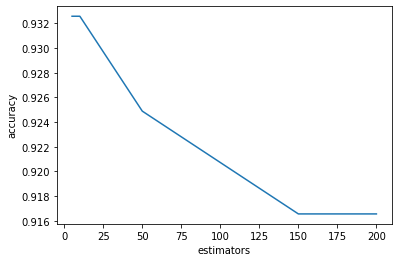

Accuracies obtained: [0.9325757575757574, 0.9325757575757574, 0.9248834498834497, 0.9165501165501164, 0.9165501165501164]
The highest accuracy: 0.9325757575757574
The corresponding optimal estimator 5
The accuracy for optimal estimator = 5 is 100.0


In [182]:
X = irisData.data 
y = irisData.target
accuracy_list=[]
best_accuracy = 0
best_estimator = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
estimators = [5, 10, 50, 150, 200]
for i in estimators:
    clf = GradientBoostingClassifier(n_estimators=i,random_state=42)
    cross_val = cross_val_score(clf , X_train, y_train,cv = 10 , scoring = 'accuracy')
    accuracy_list.append(cross_val.mean())
    if(cross_val.mean()>best_accuracy):
        best_accuracy = cross_val.mean()
        best_estimator = i
plt.plot(estimators,accuracy_list)
plt.xlabel('estimators')
plt.ylabel('accuracy')
plt.show()
#Testing the model using the optimal estimator
c1=GradientBoostingClassifier(n_estimators=best_estimator,random_state=42)
c1.fit(X_train,y_train)
X_pred = c1.predict(X_test)
accuracy_scores=accuracy_score(y_test,X_pred)
print('Accuracies obtained:',accuracy_list)
print('The highest accuracy:',best_accuracy)
print('The corresponding optimal estimator',best_estimator)
print("The accuracy for optimal estimator = {0} is {1}".format(best_estimator,accuracy_scores*100))

**The best value for n_estimator**

Gradient boosting classifier in general combines weak learning models to form a strong predictive model.Here the weak learners are considered to be the decision trees and the gradient boosting classifier uses the decision trees and combines them..
The optimal value of estimator is 5 in this case for the following reason:<br>
Generally higher the number of trees-->better the model but 
increasing the trees even further-->slows down the training-->leads to overfitting<br>
So when we reach a point that gives the best accuracy , we consider that as the optimal value.

**Hence we choose estimator value as 5**

**Why Splitting of the Dataset into train and test?**

We divide the dataset into training data and testing data to fit our model on the traning data that contains a known output and the model learns on this data in order to be generalized to other future data which may occur.We have the testing data in order to test our model's prediction on the data provided by the training data.So if we use the entire data sample on training the model alone we wont be able to evaluate the model.

**Why did I use Validation test to evaluate when finding the best parameters for KNN?**

In case of KNN Classifier we split the data into training, validation and test dataset.Validation set evaluates the performance of our model for different combinations of hyperparameter values and keep the best trained model.We use validation dataset inorder to make sure the k value we choose is not an overfit or a underfit. We then test the model on the test data.The test set allows you to compare different models in an unbiased way, by basing your comparisons in data that were not use in any part of your training/hyperparameter selection process. Hence the split is done.

**Effect of changing k for KNN**

To find the best k we run the KNN classifier several times and then choose the value which gives maximum accuracy and for which the errors encountered are least. The k values we are considering are :1,5,10,15,20,25,30,35. From the graph we can observe that initially when the classifier was trained with small values of k, the predictions was not stable and the values we obtained were less accurate. As k value gradually increased the accuracy improved and we then reached a point when the prediction was stabler than the other k values. After a particular value k, the number of errors we encountered increased which means that we have increased the k value beyond the best fit. By this we an infer that the k value should neither be too small or too big.
The best value of k for KNN is highly data-dependent. In general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct. 

**Relative effect of changing the max depths for decision tree, random forests and gradients boosting**

In decision tree as the depth of the tree increases, the accuracy decreases or increases but never reaches the accuracy obtained at the optimal depth as seen in the graph obtained. This is due to overfitting of the data.
But when considered in the case of random forest, as the depth of tree increases, the accuracy decreases gradually.This variation in accuracy of these classifiers is due to the fact that decision trees takes the training set as a whole and computes the accuracy of the model, whereas in random forest the accuracy of the model is the mean of the multiple decision trees which are constructed randomly.

**Relative effect of changing the number of tree depths for random forests and Gradient Boosting**

--We observe in the graph plotted, as the number of estimaters increase the accuracy increases until a optimal value and then decreases evidently. Thre reason being that as the number of estimators increase, the number of trees involved also increase and adding more trees slows down the process considerably.<br>



**Relative effect performance of gradient boosting compared with random forest**

In random forest classifier we can observe that after a point is reached there is randomness in the accuray of the model, whereas in gradient tree boosting with the increase in number of estimators, the accuracy increases until a optimal value and then decreases. The Construction of gradient tree boosting and decision tree is the reason behind this variation. The random forest combines the result of accuracy of multiple decision trees by taking the average at the end of the process whereas gradient tree boosting combines the results along the way which would help the weak learning decision tree to improvise.

**What is parameter C in SVM classifier?**

The C parameter is a regularization/slack parameter that helps the model to reduce the misclassification. With the help of linear svm We try to achieve:
--Lower misclassification rate
--Larger margin
To achieve both of these parallely we use the regularzation parameter c. The c values(0.1,0.5,1,2,5,10,20,50) considered in our case spans over a larger range.So when the value of c is small there was a smaller margin because smaller values force the weights to be small, more misclassification hence lesser accuracy.Resultantly, as the value of c increased the hyperplane margin also increased thereby reducing the classification error rate on the training data. As the c value increased, the prediction results stop improving which may have been happened due to over-fitting of data and lead to less accuracy. Your training time and number of support vectors will increase as you increase the value of C and hence we choose c value to be 2 as it is smallest value among the ones providing the same accuracy.